<a href="https://colab.research.google.com/github/kap2fox/Data_driven_education/blob/main/Data_driven_approach_in_HE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving DISC_balanced.csv to DISC_balanced.csv


In [ ]:
data_frame = pd.read_csv("DISC_balanced.csv");
#data_frame[["team_name","middle_pitch","final_pitch","team_mark","lead_letter"]]
#data_frame.describe()
#data_frame.to_csv("DISC.csv")

In [ ]:
data_frame.groupby('lead_letter', as_index=False, sort=False).agg({'final_pitch':['mean','std'],'middle_pitch':['mean','std'],'team_mark':['mean','std'],'fleisch_index':'mean','tasks':'mean'})

lead_letter final_pitch           middle_pitch           team_mark           \
                     mean       std         mean       std      mean      std   
0           B   13.230769  4.025416     6.215385  1.446747     79.90  7.53912   
1           I   12.480000  3.422734     5.710000  2.483926     78.16  8.64397   

  fleisch_index      tasks  
           mean       mean  
0     50.636364  61.846154  
1     33.800000  47.200000

In [ ]:
DISC = data_frame[["Dominance","Influence","Steadiness","Compliance"]]
data_frame = data_frame.assign(DISC_std = DISC.std(axis=1))
data_frame[["DISC_std","lead_letter"]]

,DISC_std,lead_letter
0,0.816497,B
1,1.414214,I
2,1.000000,B
3,1.414214,I
4,0.816497,B
5,0.816497,B
6,1.290994,I
7,0.816497,B
8,0.577350,B
9,2.160247,I


<Axes: xlabel='task_mean', ylabel='fleisch_index'>

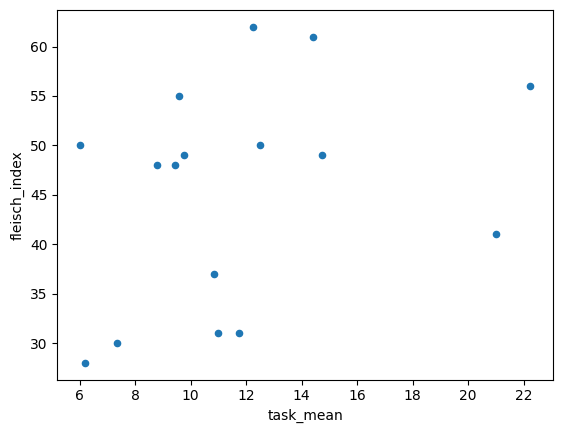

In [ ]:
data_frame["task_mean"] = data_frame["tasks"]/data_frame["teammates"]
sorted_df = data_frame.sort_values(by=['team_mark']);
sorted_df.plot(kind='scatter', x='task_mean', y='fleisch_index')

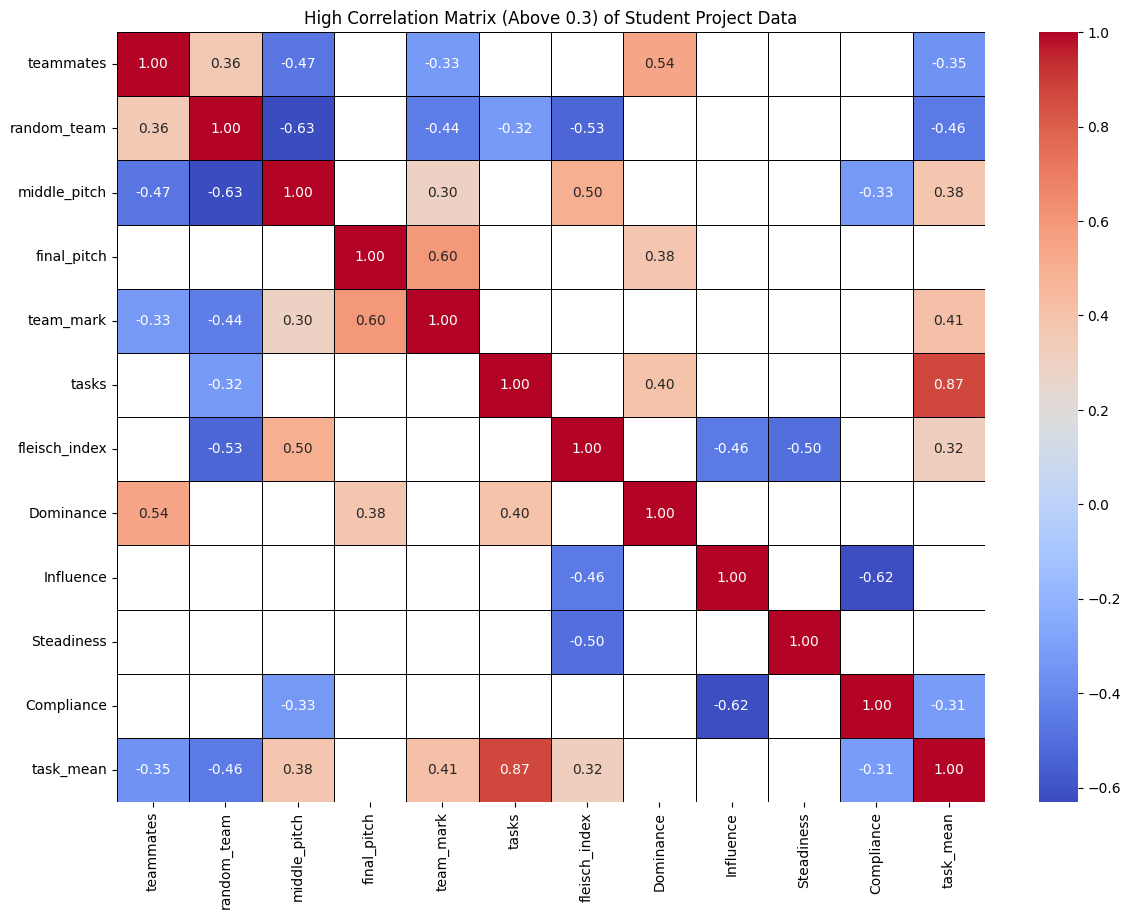

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating correlation matrix
correlation_matrix = data_frame.corr(numeric_only=True)

# Filtering the correlation matrix to keep only values where the absolute correlation is greater than 0.4
high_correlation_matrix = correlation_matrix[abs(correlation_matrix) > 0.4]

# Removing NaN values (which are the result of filtering)
#high_correlation_matrix = high_correlation_matrix.dropna(how='all', axis=0)
#high_correlation_matrix = high_correlation_matrix.dropna(how='all', axis=1)

# Plotting the refined heatmap
plt.figure(figsize=(14, 10))
picture = sns.heatmap(high_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor="black")
plt.title('High Correlation Matrix (Above 0.3) of Student Project Data')
plt.show()
figure = picture.get_figure()
figure.savefig('heatmap.png', dpi=400)

In [ ]:
print(correlation_matrix)

               teammates  random_team  final_pitch  middle_pitch     tasks  \
teammates       1.000000     0.350801     0.311961     -0.494243  0.200969   
random_team     0.350801     1.000000    -0.033212     -0.630631 -0.320438   
final_pitch     0.311961    -0.033212     1.000000     -0.265704  0.106722   
middle_pitch   -0.494243    -0.630631    -0.265704      1.000000  0.145635   
tasks           0.200969    -0.320438     0.106722      0.145635  1.000000   
team_mark      -0.355110    -0.493974     0.482731      0.327870  0.200430   
fleisch_index  -0.255510    -0.533851    -0.139260      0.497968  0.242395   
Dominance       0.544609     0.004867     0.376699     -0.101969  0.397396   
Influence       0.244451     0.110439     0.044369      0.145324  0.042448   
Steadiness      0.238879    -0.070512    -0.039745     -0.090913  0.190755   
Compliance      0.168288     0.076934     0.086771     -0.330078 -0.190382   
DISC_std       -0.000436     0.263879    -0.008410     -0.110657